<a href="https://colab.research.google.com/github/san-saha/Quantum-ChaCha/blob/main/StateIntialize_ARX_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install pylatexenc

     |████████████████████████████████| 162 kB 12.2 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=59f63fec9fbe985b27204778c9b1cd64f5015e2532ca41c80b54e1cbec225ea0
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [3]:
! pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-6e2v8_wt
  Running command git clone -q https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-6e2v8_wt
     |████████████████████████████████| 6.5 MB 10.6 MB/s 
     |████████████████████████████████| 18.0 MB 33.0 MB/s 
     |████████████████████████████████| 238 kB 62.6 MB/s 
     |████████████████████████████████| 200 kB 66.3 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 1.6 MB 53.0 MB/s 
     |████████████████████████████████| 943 kB 57.4 MB/s 
     |████████████████████████████████| 37.5 MB 1.2 MB/s 
     |████████████████████████████████| 38.1 MB 1.1 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
     |████████████████████████████████| 49 kB 6.0 MB/s 
     |████████████████████████████████| 3.6 MB 52.5 MB/s 
     |████████████████████████████████| 113 kB 67.6 MB/s 
  Created wheel for qiskit-textbook: fi

In [4]:
from qiskit.providers.aer import AerSimulator
from qiskit import *

In [ ]:
# desired_state = [1/2, 1/2, 1/2, 1/2]
# qr = QuantumRegister (2, "q")
# qc = QuantumCircuit (qr)
# qc.initialize(desired_state,[0,1])

In [ ]:
# qc1=qc.copy()
# qc1.measure_all()
# measure(qc1)

{'01': 274, '00': 252, '10': 240, '11': 258}
i   j   k   l  01 
i   j   k   l  00 
i   j   k   l  10 
i   j   k   l  11 


##### measure function

In [5]:
def measure(qc, i=0,j=0,k=0,l=0,A=0,B=0,C=0,D=0,ancilla=0):
  # Select the AerSimulator from the Aer provider
  simulator = AerSimulator(method='matrix_product_state')

  # Run and get counts, using the matrix_product_state method
  tcirc = transpile(qc, simulator)
  result = simulator.run(tcirc).result()
  counts = result.get_counts(0)
  print(counts)
  for key in counts.keys():

      if(A):
        print("A\t",key[-32:], "\t", hex(int(key[-32:],2)))
        print("A\t",key[-32:])
      if(B):
        print("B\t",key[-32*2:-32*1], "\t", hex(int(key[-32*2:-32*1],2)))
        print("B\t",key[-32*2:-32*1])
      if(C):
        print("C\t",key[-32*3:-32*2], "\t", hex(int(key[-32*3:-32*2],2)))
        print("C\t",key[-32*3:-32*2])
      if(D):
        print("D\t",key[-32*4:-32*3], "\t", hex(int(key[-32*4:-32*3],2)))
        print("D\t",key[-32*4:-32*3])

      if(i):
        print("i",key[6:8], end=" ")
      if(j):
        print("j",key[4:6], end=" ")
      if(k):
        print("k",key[2:4], end=" ")
      if(l):
        print("l",key[0:2], end=" ")
      print()

#### using gates

In [6]:
def set0(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,1,1,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set0")

  return qc

In [7]:
def set1(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,0,0,0
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set1")

  qc.x(a)
  qc.x(b)
  qc.ccx(a,b,x)
  qc.x(a)
  qc.x(b)

  return qc


In [8]:
def set2(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,1,0,0
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set2")

  qc.x(b)
  qc.ccx(a,b,x)
  qc.x(b)

  return qc


In [9]:
def set3(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,1,0,0
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set3")

  qc.cx(b,x)
  qc.x(x)

  return qc


In [10]:
def set4(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,0,1,0
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set4")

  qc.x(a)
  qc.ccx(a,b,x)
  qc.x(a)

  return qc


In [11]:
def set5(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,0,1,0..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set5")

  qc.cx(a,x)
  qc.x(x)

  return qc


In [12]:
def set6(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,1,1,0..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set6")

  qc.cx(a,x)
  qc.cx(b,x)

  return qc


In [13]:
def set7(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,1,1,0..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set7")

  qc.ccx(a,b,x)
  qc.x(x)

  return qc


In [14]:
def set8(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,0,0,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set8")

  qc.ccx(a,b,x)

  return qc


In [15]:
def set9(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,0,0,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set9")

  qc.cx(a,x)
  qc.cx(b,x)
  qc.x(x)

  return qc


In [16]:
def set10(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,1,0,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set10")

  qc.cx(a,x)

  return qc


In [17]:
def set11(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,1,0,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set11")

  qc.x(a)
  qc.ccx(a,b,x)
  qc.x(x)
  qc.x(a)

  return qc


In [18]:
def set12(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,0,1,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set12")

  qc.cx(b,x)

  return qc


In [19]:
def set13(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,0,1,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set13")

  qc.x(b)
  qc.ccx(a,b,x)
  qc.x(x)
  qc.x(b)

  return qc


In [20]:
def set14(): # b=iR1,a=iR0=>a0,a1,a2,a3=0,1,1,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set14")

  qc.x(b)
  qc.x(a)
  qc.ccx(a,b,x)
  qc.x(x)
  qc.x(a)
  qc.x(b)

  return qc


In [21]:
def set15(): # b=iR1,a=iR0=>a0,a1,a2,a3=1,1,1,1..............iR0,iR1,a[k]
  a=QuantumRegister(1,'a')
  b=QuantumRegister(1,'b')
  x=QuantumRegister(1,'x')
  qc=QuantumCircuit(a,b,x, name="set15")

  qc.x(x)

  return qc


In [22]:
dispatcher={'0000':set0,'0001':set1,'0010':set2,'0011':set3,'0100':set4,'0101':set5,'0110':set6,'0111':set7,'1000':set8,'1001':set9,'1010':set10,'1011':set11,'1100':set12,'1101':set13,'1110':set14,'1111':set15}

#### quantum circuit

In [23]:
a=QuantumRegister(32, 'a')
b=QuantumRegister(32, 'b')
c=QuantumRegister(32, 'c')
d=QuantumRegister(32, 'd')

ancilla = QuantumRegister(1, 'ancilla')

iR=QuantumRegister(2, 'iR')
jR=QuantumRegister(2, 'jR')
kR=QuantumRegister(2, 'kR')
lR=QuantumRegister(2, 'lR')

qc=QuantumCircuit(a,b,c,d,ancilla,iR,jR,kR,lR)


In [24]:
a_l=list(range(32*0,32*1))        # A block
b_l=list(range(32*1,32*2))        # B block
c_l=list(range(32*2,32*3))        # C block
d_l=list(range(32*3,32*4))        # D block
ancilla_l=list([32*4])

In [25]:
i_l=list(range(129,131))
j_l=list(range(131,133))
k_l=list(range(133,135))
l_l=list(range(135,137))

In [ ]:
i_l

[129, 130]

In [26]:
desired_state = [1/2, 1/2, 1/2, 1/2]

### State Initialize

#### Initialize A

In [27]:
desired_state = [1/2, 1/2, 1/2, 1/2]
qc.initialize(desired_state, range(129,131))
# qc.initialize(desired_state, range(131,133))
# qc.initialize(desired_state, range(133,135))
# qc.initialize(desired_state, range(135,137))

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, i=1,j=1,k=1,l=1)

{'00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 247, '00000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 243, '00000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 278, '00000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 256}
i 00 j 00 k 00 l 00 
i 11 j 00 k 00 l 00 
i 10 j 00 k 00 l 00 
i 01 j 00 k 00 l 00 


In [28]:
# a0_input, a1_input, a2_input, a3_input  = input("enter hex for A:").split()
a0_input, a1_input, a2_input, a3_input= "61707865 3320646e 79622d32 6b206574 ".split()

In [29]:
n=32
a0_input = bin(int(a0_input,16))[2:].zfill(n)
a1_input = bin(int(a1_input,16))[2:].zfill(n)
a2_input = bin(int(a2_input,16))[2:].zfill(n)
a3_input = bin(int(a3_input,16))[2:].zfill(n)
print(a0_input, a1_input, a2_input, a3_input )

01100001011100000111100001100101 00110011001000000110010001101110 01111001011000100010110100110010 01101011001000000110010101110100


00000000000000000000000000000001  
00000000000000000000000000000000  
01001010000000000000000000000000  
00000000000000000000000000000000

In [30]:
for i in range(0,32):
  w=a3_input[-i-1]+a2_input[-i-1]+a1_input[-i-1]+a0_input[-i-1]
  if(w!='0000'):
    try:
      set_func=dispatcher[w]
    except KeyError:
      raise ValueError('invalid state number')
    qc.append(set_func(), i_l+[32*0+i])

In [ ]:
# i_l+[32*0+i]

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, i=1, A=1)

{'00000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110011001000000110010001101110': 274, '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100001011100000111100001100101': 247, '00000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111001011000100010110100110010': 248, '00000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001101011001000000110010101110100': 255}
A	 00110011001000000110010001101110 	 0x3320646e
A	 00110011001000000110010001101110
i 01 
A	 01100001011100000111100001100101 	 0x61707865
A	 01100001011100000111100001100101
i 00 
A	 01111001011000100010110100110010 	 0x79622d32
A	 01111001011000100010110100110010
i 10 
A	 01101011001000000110010101110100 	 0x6b206574
A	 01101011001000000110010101110100
i 11 


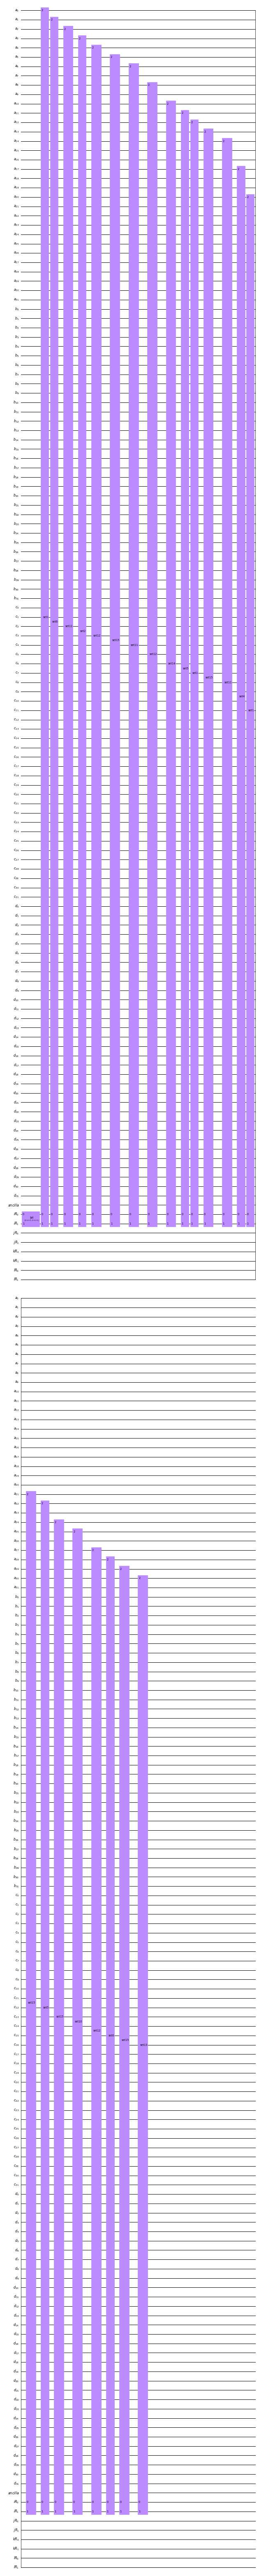

In [ ]:
qc.draw(output="mpl", scale=0.5, filename="stateInitA")

#### Initialize B

In [ ]:
qcX = qc.copy()

In [ ]:
# qcX.cx(iR[0],jR[0])
# qcX.cx(iR[1],jR[1])

In [31]:
qc.initialize(desired_state, range(131,133))

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, j=1, B=1)

{'00000011000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001101011001000000110010101110100': 57, '00000110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111001011000100010110100110010': 67, '00001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100001011100000111100001100101': 60, '00001101000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000110011001000000110010001101110': 67, '00000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001111001011000100010110100110010': 62, '00000100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100001011100000111100001100101': 67, '00001100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001100001011100000111100

In [32]:
# b0_input, b1_input, b2_input, b3_input  = input("enter hex for B:").split()
b0_input, b1_input, b2_input, b3_input= "03020100 07060504 0b0a0908 0f0e0d0c".split()

In [33]:
n=32
b0_input = bin(int(b0_input,16))[2:].zfill(n)
b1_input = bin(int(b1_input,16))[2:].zfill(n)
b2_input = bin(int(b2_input,16))[2:].zfill(n)
b3_input = bin(int(b3_input,16))[2:].zfill(n)
print(b0_input, b1_input, b2_input, b3_input )

00000011000000100000000100000000 00000111000001100000010100000100 00001011000010100000100100001000 00001111000011100000110100001100


00000000000000000000000000000001  
00000000000000000000000000000000  
01001010000000000000000000000000  
00000000000000000000000000000000

In [34]:
for i in range(0,32):
  w=b3_input[-i-1]+b2_input[-i-1]+b1_input[-i-1]+b0_input[-i-1]
  if(w!='0000'):
    try:
      set_func=dispatcher[w]
    except KeyError:
      raise ValueError('invalid state number')
    qc.append(set_func(), j_l+[32*1+i])

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, j=1, B=1)

{'00001011000000000000000000000000000000000000000000000000000000000000000000000101100001010000010010000100001101011001000000110010101110100': 73, '00001001000000000000000000000000000000000000000000000000000000000000000000000101100001010000010010000100000110011001000000110010001101110': 78, '00000011000000000000000000000000000000000000000000000000000000000000000000000001100000010000000010000000001101011001000000110010101110100': 61, '00000000000000000000000000000000000000000000000000000000000000000000000000000001100000010000000010000000001100001011100000111100001100101': 66, '00000111000000000000000000000000000000000000000000000000000000000000000000000011100000110000001010000010001101011001000000110010101110100': 60, '00000101000000000000000000000000000000000000000000000000000000000000000000000011100000110000001010000010000110011001000000110010001101110': 67, '00000010000000000000000000000000000000000000000000000000000000000000000000000001100000010000000010000000001111001011000100010110

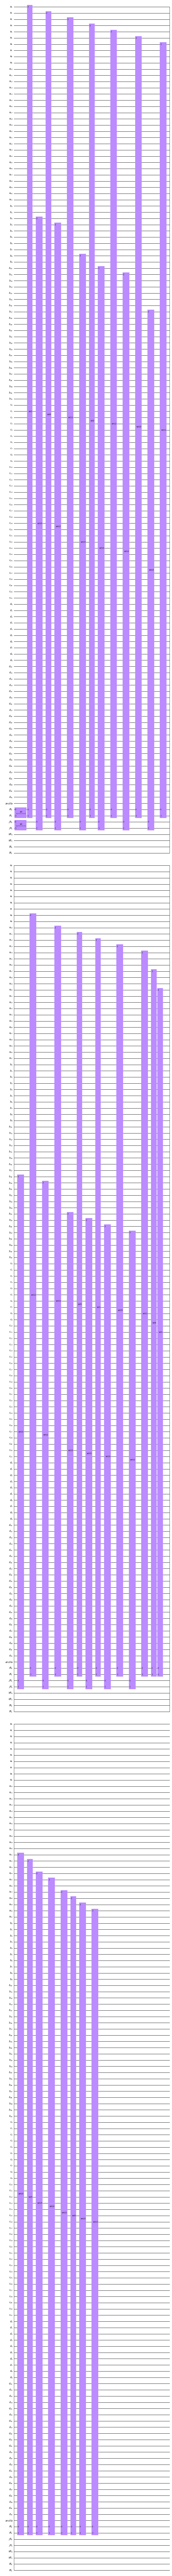

In [ ]:
qc.draw(output='mpl', scale=0.5, filename="stateInitB")

#### Initialize C

In [ ]:
# qcX.cx(iR[0],kR[0])
# qcX.cx(iR[1],kR[1])

In [35]:
qc.initialize(desired_state, range(133,135))

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, k=1, C=1)

{'00010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 256, '00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 259, '00110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 276, '00100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 233}
C	 00000000000000000000000000000000 	 0x0
C	 00000000000000000000000000000000
k 01 
C	 00000000000000000000000000000000 	 0x0
C	 00000000000000000000000000000000
k 00 
C	 00000000000000000000000000000000 	 0x0
C	 00000000000000000000000000000000
k 11 
C	 00000000000000000000000000000000 	 0x0
C	 00000000000000000000000000000000
k 10 


In [36]:
# c0_input, c1_input, c2_input, c3_input = input("enter hex for B:").split()
c0_input, c1_input, c2_input, c3_input= "13121110 17161514 1b1a1918 1f1e1d1c".split()

In [37]:
n=32
c0_input = bin(int(c0_input,16))[2:].zfill(n)
c1_input = bin(int(c1_input,16))[2:].zfill(n)
c2_input = bin(int(c2_input,16))[2:].zfill(n)
c3_input = bin(int(c3_input,16))[2:].zfill(n)
print(c0_input, c1_input, c2_input, c3_input )

00010011000100100001000100010000 00010111000101100001010100010100 00011011000110100001100100011000 00011111000111100001110100011100


00000000000000000000000000000001  
00000000000000000000000000000000  
01001010000000000000000000000000  
00000000000000000000000000000000

In [38]:
for i in range(0,32):
  w=c3_input[-i-1]+c2_input[-i-1]+c1_input[-i-1]+c0_input[-i-1]
  if(w!='0000'):
    try:
      set_func=dispatcher[w]
    except KeyError:
      raise ValueError('invalid state number')
    qc.append(set_func(), k_l+[32*2+i])

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, k=1, C=1)

{'00110000000000000000000000000000000000000000111110001111000011101000111000000000000000000000000000000000000000000000000000000000000000000': 268, '00010000000000000000000000000000000000000000101110001011000010101000101000000000000000000000000000000000000000000000000000000000000000000': 254, '00000000000000000000000000000000000000000000100110001001000010001000100000000000000000000000000000000000000000000000000000000000000000000': 244, '00100000000000000000000000000000000000000000110110001101000011001000110000000000000000000000000000000000000000000000000000000000000000000': 258}
C	 00011111000111100001110100011100 	 0x1f1e1d1c
C	 00011111000111100001110100011100
k 11 
C	 00010111000101100001010100010100 	 0x17161514
C	 00010111000101100001010100010100
k 01 
C	 00010011000100100001000100010000 	 0x13121110
C	 00010011000100100001000100010000
k 00 
C	 00011011000110100001100100011000 	 0x1b1a1918
C	 00011011000110100001100100011000
k 10 


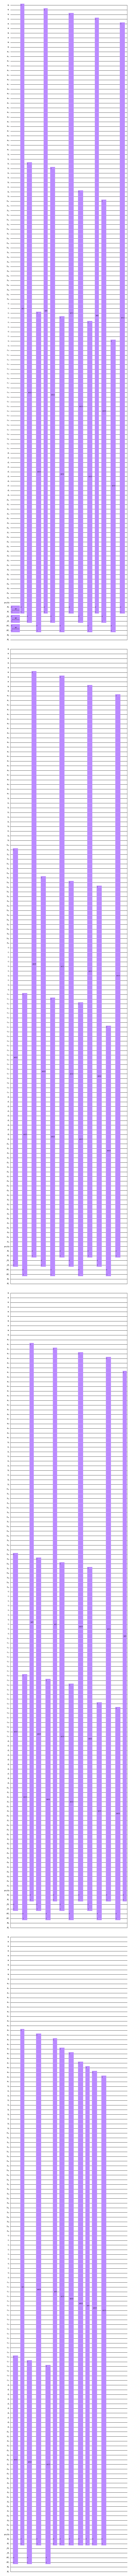

In [40]:
qc.draw(output='mpl', scale=0.5, filename="stateInitC")

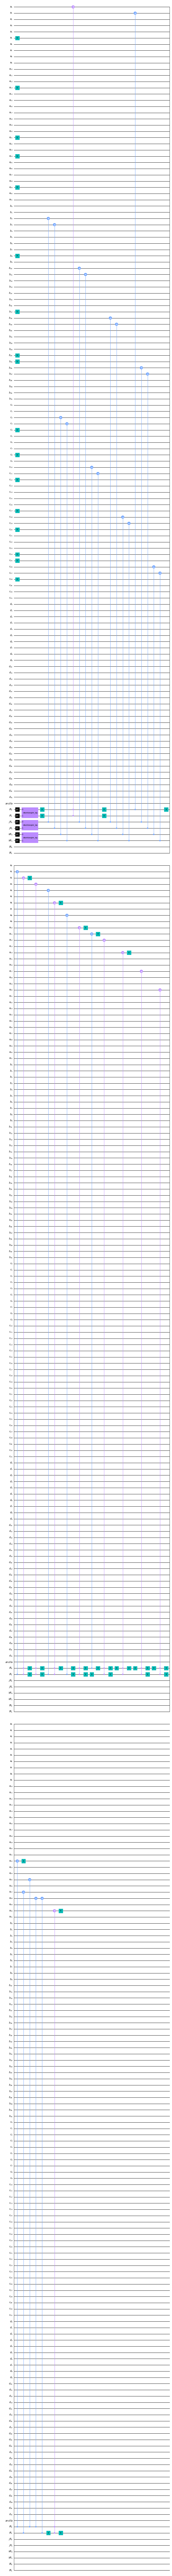

In [39]:
qc.decompose().draw(output='mpl', scale=0.5, filename="stateInitC")

#### Initialize D

In [ ]:
# qcX.cx(iR[0],lR[0])
# qcX.cx(iR[1],lR[1])

In [ ]:
desired_state = [1/2, 1/2, 1/2, 1/2]
qc.initialize(desired_state, range(135,137))

In [ ]:
# qc1=qc.copy()
# qc1.measure_all()
# measure(qc1, l=1, D=1)

In [ ]:
# d0_input, d1_input, d2_input, d3_input  = input("enter hex for D:").split()
d0_input, d1_input, d2_input, d3_input= "00000001 00000000 4a000000 00000000".split()

In [ ]:
n=32
d0_input = bin(int(d0_input,16))[2:].zfill(n)
d1_input = bin(int(d1_input,16))[2:].zfill(n)
d2_input = bin(int(d2_input,16))[2:].zfill(n)
d3_input = bin(int(d3_input,16))[2:].zfill(n)
print(d0_input, d1_input, d2_input, d3_input )

00000000000000000000000000000001 00000000000000000000000000000000 01001010000000000000000000000000 00000000000000000000000000000000


00000000000000000000000000000001  
00000000000000000000000000000000  
01001010000000000000000000000000  
00000000000000000000000000000000

In [ ]:
for i in range(0,32):
  w=d0_input[-i-1]+d1_input[-i-1]+d2_input[-i-1]+d3_input[-i-1]
  if(w!='0000'):
    try:
      set_func=dispatcher[w]
    except KeyError:
      raise ValueError('invalid state number')
    qc.append(set_func(), l_l+[32*3+i])

In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1, l=1, D=1)

{'00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 241, '11000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 267, '10000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 277, '01000000001001010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000': 239}
D	 00000000000000000000000000000000 	 0x0
D	 00000000000000000000000000000000
l 00 
D	 00000000000000000000000000000001 	 0x1
D	 00000000000000000000000000000001
l 11 
D	 00000000000000000000000000000000 	 0x0
D	 00000000000000000000000000000000
l 10 
D	 01001010000000000000000000000000 	 0x4a000000
D	 01001010000000000000000000000000
l 01 


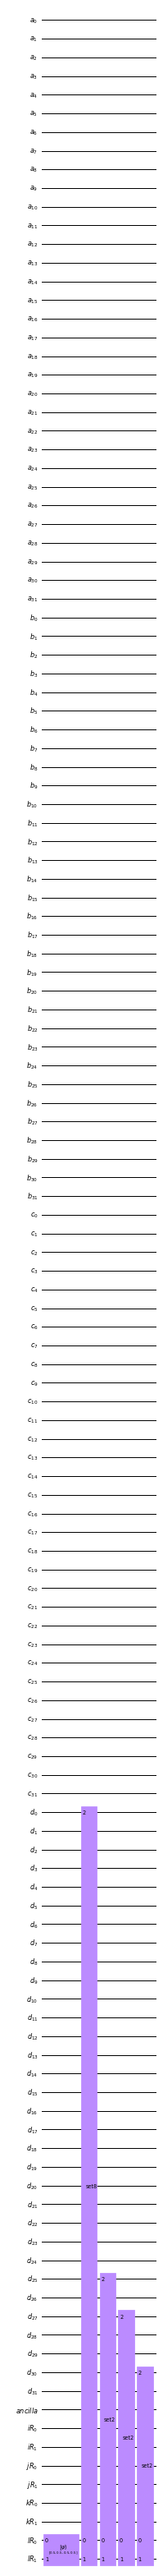

In [ ]:
qc.draw(output='mpl', scale=0.5, filename="stateInitD")

### ARX rounds

#### Addition utility function

In [43]:
def add(n):
  a = QuantumRegister(n,'a')
  b = QuantumRegister(n,'b')
  ancilla = QuantumRegister(1, 'ancilla')
  z = QuantumRegister(1, 'z')
  qc = QuantumCircuit (a, b, ancilla, z, name="add")
  # qc = QuantumCircuit (a, b, ancilla, name="add")
  # qc.draw(output='mpl')

  for i in range(1,n):
    qc.cx(a[i],b[i])

  qc.cx(a[1], ancilla)
  qc.ccx(a[0], b[0], ancilla)
  qc.cx(a[2], a[1])
  qc.ccx(ancilla, b[1], a[1])
  qc.cx(a[3], a[2])

  for i in range(2,n-2):        
    qc.ccx(a[i-1],b[i],a[i])
    qc.cx(a[i+2],a[i+1])

  qc.ccx(a[n-3],b[n-2],a[n-2])
  qc.cx(a[n-1],z)

  qc.ccx(a[n-2],b[n-1],z)
  for i in range(1, n-1):
    qc.x(b[i])

  qc.cx(ancilla, b[1])
  for i in range(2, n):
    qc.cx(a[i-1],b[i])

  qc.ccx(a[n-3],b[n-2],a[n-2])
  for i in range(n-3,1,-1):
    qc.ccx(a[i-1],b[i],a[i])
    qc.cx(a[i+2],a[i+1])
    qc.x(b[i+1])

  qc.ccx(ancilla,b[1],a[1])
  qc.cx(a[3],a[2])
  qc.x(b[2])

  qc.ccx(a[0],b[0],ancilla)
  qc.cx(a[2],a[1])
  qc.x(b[1])

  qc.cx(a[1],ancilla)

  for i in range(0,n):
    qc.cx(a[i],b[i])

  # qc.measure_all()
  # qc.draw(output='mpl', filename="add_"+str(n))
  return qc

In [44]:
def add():
  n=31
  a = QuantumRegister(n,'a')
  b = QuantumRegister(n,'b')
  ancilla = QuantumRegister(1, 'ancilla')
  z = QuantumRegister(1, 'z')
  qc = QuantumCircuit (a, b, ancilla, z, name="add")
  # qc = QuantumCircuit (a, b, ancilla, name="add")
  # qc.draw(output='mpl')

  for i in range(1,n):
    qc.cx(a[i],b[i])

  qc.cx(a[1], ancilla)
  qc.ccx(a[0], b[0], ancilla)
  qc.cx(a[2], a[1])
  qc.ccx(ancilla, b[1], a[1])
  qc.cx(a[3], a[2])

  for i in range(2,n-2):        
    qc.ccx(a[i-1],b[i],a[i])
    qc.cx(a[i+2],a[i+1])

  qc.ccx(a[n-3],b[n-2],a[n-2])
  qc.cx(a[n-1],z)

  qc.ccx(a[n-2],b[n-1],z)
  for i in range(1, n-1):
    qc.x(b[i])

  qc.cx(ancilla, b[1])
  for i in range(2, n):
    qc.cx(a[i-1],b[i])

  qc.ccx(a[n-3],b[n-2],a[n-2])
  for i in range(n-3,1,-1):
    qc.ccx(a[i-1],b[i],a[i])
    qc.cx(a[i+2],a[i+1])
    qc.x(b[i+1])

  qc.ccx(ancilla,b[1],a[1])
  qc.cx(a[3],a[2])
  qc.x(b[2])

  qc.ccx(a[0],b[0],ancilla)
  qc.cx(a[2],a[1])
  qc.x(b[1])

  qc.cx(a[1],ancilla)

  for i in range(0,n):
    qc.cx(a[i],b[i])

  # qc.measure_all()
  # qc.draw(output='mpl', filename="add_"+str(n))
  return qc

In [45]:
def additionMod32(n):           # a,b..........a,b=a+b
  a = QuantumRegister(n,'a')
  b = QuantumRegister(n,'b')
  ancilla = QuantumRegister(1, 'ancilla')
  qc = QuantumCircuit (a, b, ancilla,  name="add_mod_32")

  l=list(range(n*2+1))
  l.remove(n-1)
  l.remove(n*2-1)

  add_circuit=add(n-1)
  print("additionMod32")
  qc.append(add_circuit, l+[n*2-1])
  qc.cx(a[n-1],b[n-1])

  return qc

In [55]:
def additionMod32():           # a,b..........a,b=a+b
  n=32
  a = QuantumRegister(n,'a')
  b = QuantumRegister(n,'b')
  ancilla = QuantumRegister(1, 'ancilla')
  qc = QuantumCircuit (a, b, ancilla,  name="add_mod_32")

  l=list(range(n*2+1))
  l.remove(n-1)
  l.remove(n*2-1)

  # add_circuit=add(n-1)
  add_circuit=add().to_gate()
  print("additionMod32")
  qc.append(add_circuit, l+[n*2-1])
  qc.cx(a[n-1],b[n-1])

  return qc

#### XOR utility function

In [47]:
def XOR(n):             # a,b ............ a=a^b,b
  a=QuantumRegister(n,'a')
  b=QuantumRegister(n,'b')
  qc=QuantumCircuit(a,b, name="XOR")
  for i in range(n):
    qc.cx(b[i],a[i])

  # qc.draw(output='mpl', filename='XOR')
  
  return qc

#### Rotation utility

In [48]:
def swap_n(n):          # n is size of each register

  a=QuantumRegister(n,'a')
  b=QuantumRegister(n,'b')
  qc=QuantumCircuit(a,b,name="swap_"+str(n))

  for i in range(n):
    qc.swap(a[i],b[i])

  # qc.draw(output='mpl', filename="swap_"+str(n))

  return qc

##### rotate16

In [49]:
def rotate16(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a, name="rotate16")

  qc.append(swap_n(16), range(n))           #counting 0 starts form LSB
  # qc.draw(output='mpl', filename='rotate16')

  return qc


##### rotate8

In [50]:
def rotate8(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a, name="rotate8")

  # print(range(8*0,8*2))
  qc.append(swap_n(8), range(8*0,8*2))

  qc.append(swap_n(8), range(8*2,8*4))


  l=list(range(8*0,8*1))
  m=list(range(8*2,8*3))
  # print(l+m)
  qc.append(swap_n(8), l+m)
  # qc.draw(output='mpl', filename="rotate8")

  return qc

##### rotate12

In [51]:
def rotate12(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a,name="rotate12")


  l=list(range(4*0,4*1))        # 8 block
  m=list(range(4*2,4*3))        # 6 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*2,4*3))        # 6 block
  m=list(range(4*1,4*2))        # 7 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*4,4*5))        # 4 block
  m=list(range(4*2,4*3))        # 6 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*1,4*2))        # 7 block
  m=list(range(4*3,4*4))        # 5 block
  qc.append(swap_n(4), l+m)

  l=list(range(4*2,4*3))        # 6 block
  m=list(range(4*7,4*8))        # 1 block
  qc.append(swap_n(4), l+m)
  
  l=list(range(4*1,4*2))        # 7 block
  m=list(range(4*6,4*7))        # 2 block
  qc.append(swap_n(4), l+m)
  
  l=list(range(4*0,4*1))        # 8 block
  m=list(range(4*5,4*6))        # 3 block
  qc.append(swap_n(4), l+m)

  # qc.draw(output='mpl', filename="rotate12")


  return qc

##### rotate7

In [52]:
def rotate7(n):
  a=QuantumRegister(n,'a')
  qc=QuantumCircuit(a, name="rotate7")


  l=[0]     
  m=[2]       
  qc.append(swap_n(1), l+m)


  l=[3]        
  m=[2]       
  qc.append(swap_n(1), l+m)


  l=[0]        
  m=[1]       
  qc.append(swap_n(1), l+m)

  l=list(range(4,7))
  m=list(range(0,3))       
  qc.append(swap_n(3), l+m)

  l=list(range(7,11))       
  m=list(range(3,7))       
  qc.append(swap_n(4), l+m)

  l=list(range(11,18))       
  m=list(range(0,7))       
  qc.append(swap_n(7), l+m)

  l=list(range(18,25))       
  m=list(range(0,7))       
  qc.append(swap_n(7), l+m)

  l=list(range(25,32))       
  m=list(range(0,7))       
  qc.append(swap_n(7), l+m)

  # qc.draw(output='mpl', filename="rotate7")
  
  return qc

#### applying ARX round

#### testing

In [ ]:
qcX=qc.copy()

In [56]:
qc.append(additionMod32().control(4, ctrl_state="0000"), i_l+j_l+b_l+a_l+ancilla_l)

additionMod32


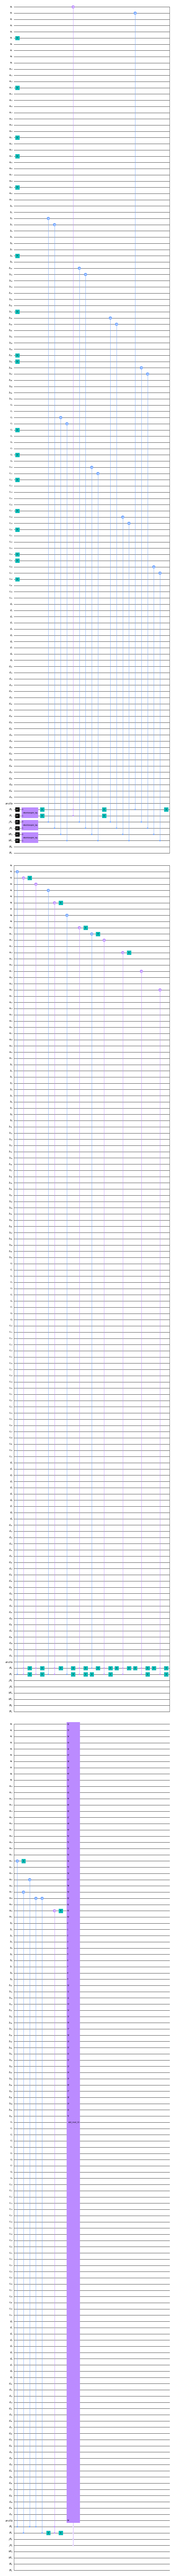

In [58]:
qc.decompose().draw(output='mpl', scale=0.5)

In [ ]:
# qcX.ControlledGate(additionMod32(),4+32+32+1,32,4,b_l+a_l+ancilla_l,'0000')

AttributeError: ignored

##### one block arx

In [ ]:
qc.append(additionMod32(32), b_l+a_l+ancilla_l)         # a+=b
qc.append(XOR(32), d_l+a_l)                             # d^=a
qc.append(rotate16(32), d_l)                            # d<<<16

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000001111001011001000110010001110010000100110001001000010001000100000000001100000010000000010000000001100100011100100111100101100101': 1024}
A	 01100100011100100111100101100101 	 0x64727965
B	 00000011000000100000000100000000 	 0x3020100
C	 00010011000100100001000100010000 	 0x13121110
D	 01111001011001000110010001110010 	 0x79646472
i	 00
j	 00
k	 00
l	 00


In [ ]:
qc.append(additionMod32(32), d_l+c_l+ancilla_l)           # c+=d
qc.append(XOR(32), b_l+c_l)                               # b^=c
qc.append(rotate12(32), b_l)                              # b<<<12

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000001111001011001000110010001110010100011000111011001110101100000100100011101001000001010001111011101100100011100100111100101100101': 1024}
A	 01100100011100100111100101100101 	 0x64727965
B	 01000111010010000010100011110111 	 0x474828f7
C	 10001100011101100111010110000010 	 0x8c767582
D	 01111001011001000110010001110010 	 0x79646472
i	 00
j	 00
k	 00
l	 00


In [ ]:
qc.append(additionMod32(32), b_l+a_l+ancilla_l)           # a+=b
qc.append(XOR(32), d_l+a_l)                               # d^=a
qc.append(rotate8(32), d_l)                               # d<<<8

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000011011110110001100010111011010010100011000111011001110101100000100100011101001000001010001111011110101011101110101010001001011100': 1024}
A	 10101011101110101010001001011100 	 0xabbaa25c
B	 01000111010010000010100011110111 	 0x474828f7
C	 10001100011101100111010110000010 	 0x8c767582
D	 11011110110001100010111011010010 	 0xdec62ed2
i	 00
j	 00
k	 00
l	 00


In [ ]:
qc.append(additionMod32(32), d_l+c_l+ancilla_l)           # c+=d
qc.append(XOR(32), b_l+c_l)                               # b^=c
qc.append(rotate7(32), b_l)                               # b<<<7

qc.barrier()

additionMod32


In [ ]:
qc1=qc.copy()
qc1.measure_all()
measure(qc1)

{'00000000011011110110001100010111011010010011010110011110010100100010101000011101001000110010100011001011010101011101110101010001001011100': 1024}
A	 10101011101110101010001001011100 	 0xabbaa25c
B	 00111010010001100101000110010110 	 0x3a465196
C	 01101011001111001010010001010100 	 0x6b3ca454
D	 11011110110001100010111011010010 	 0xdec62ed2
i	 00
j	 00
k	 00
l	 00
